# Jogos Olímpicos

## Análise exploratória com os dados dos Jogos Olímpicos 


#### Durante os Jogos Olímpicos de 2020 em tóquio(ocorreu na verdade em 2021) tive dois questionamentos:

#### quem acompanha Olímpiadas há algum tempo, sabe que países como USA, Russia e China sempre estão no Top 3 do quadro de medalhas. 

#### Será que com o aumento do número de países participantes nos Jogos Olímpicos a porção de medalhas obtida pelo Top 3 do quadro de medalhas diminuiu ? 

#### Em outras palavras, será que o Share/porção de medalhas conquistada pelo Top 3 diminuiu ?

#### E com relação a participação feminina ?  Como é a evolução da participação feminina na equipe olímpica brasileira ? E a nível mundial ?

#### Pretendo responder estas questões neste notebook!

#### Primeiro vamos analisar a evolução da participação feminina; em seguida iremos analisar o Share de medalhas


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
jogos = pd.read_csv('C:\\Users\\Caio\\Desktop\\Olimpiadas\\Dados\\athlete_events.csv')

regioes = pd.read_csv('C:\\Users\\Caio\\Desktop\\Olimpiadas\\Dados\\noc_regions.csv')

In [3]:
dados = pd.merge(jogos, regioes, how = 'left', on = 'NOC')

## 1.0 - Número de Atletas e Participação das Mulheres nos Jogos Olímpicos

In [4]:
atletas = dados[dados['Season'] == 'Summer']

atletas = atletas.drop_duplicates(subset=['ID', 'Year'])

atletas = atletas.groupby(['NOC', 'Year', 'Sex'])['ID'].count().reset_index()

In [5]:
atletas = atletas.pivot_table(values = 'ID', index = ['NOC', 'Year'], columns = 'Sex', aggfunc = 'sum').fillna(0).reset_index()

atletas = atletas.groupby('Year')[['F','M']].sum().reset_index()

atletas['total'] = atletas['M'] + atletas['F']

atletas['proporcao_mulher'] = (atletas['F'] / atletas['total']*100)

atletas['proporcao_mulher'] = atletas['proporcao_mulher'].round(1)

atletas

Sex,Year,F,M,total,proporcao_mulher
0,1896,0.0,176.0,176.0,0.0
1,1900,23.0,1201.0,1224.0,1.9
2,1904,6.0,644.0,650.0,0.9
3,1906,6.0,835.0,841.0,0.7
4,1908,44.0,1980.0,2024.0,2.2
5,1912,53.0,2356.0,2409.0,2.2
6,1920,78.0,2598.0,2676.0,2.9
7,1924,156.0,3100.0,3256.0,4.8
8,1928,312.0,2935.0,3247.0,9.6
9,1932,201.0,1721.0,1922.0,10.5


In [17]:
#for i, x in enumerate(atletas):
#    if atletas[x].dtype == 'float64':
#        atletas[x] = atletas[x].astype(int)
    

#### Número de atletas nos Jogos Olímpicos

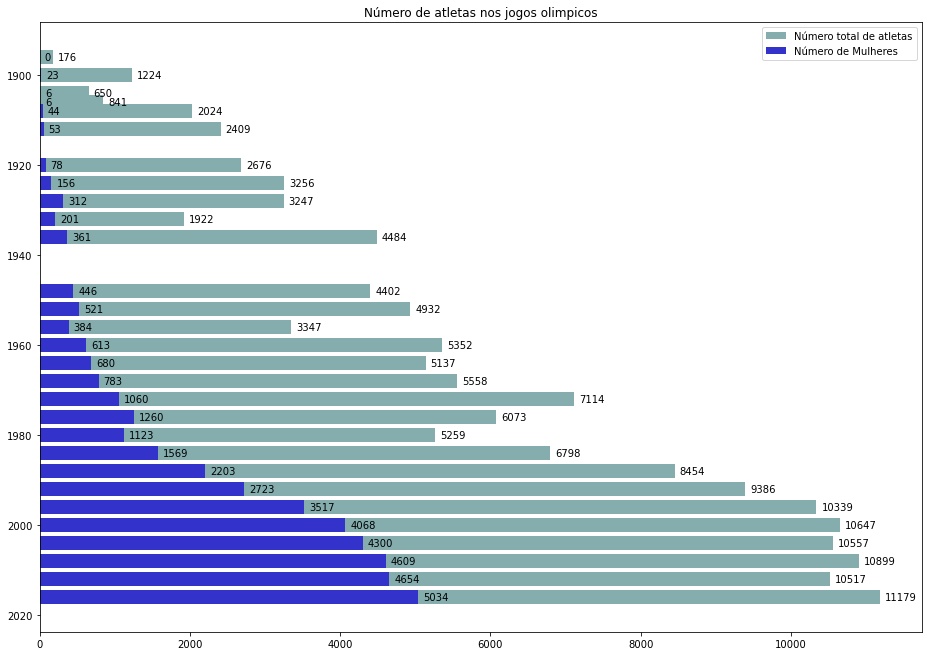

In [6]:
fig, ax = plt.subplots(figsize = (13,9))

ax.barh(atletas['Year'], atletas['total'],height=3.2, align='center', color = '#85adad')
ax.barh(atletas['Year'], atletas['F'],height=3.2, align='center', color = '#3333cc')


ax.invert_yaxis()  # labels read top-to-bottom
plt.tight_layout()
plt.title('Número de atletas nos jogos olimpicos')
plt.legend(['Número total de atletas', 'Número de Mulheres'])



rects = ax.patches

# obrigado stackoverflow
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'

    
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = "{:.0f}".format(x_value)

    
    plt.annotate(
        label,                     
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',               
        ha=ha,)


#### Evolução do Número de atletas por gênero

Text(0.5, 0, '')

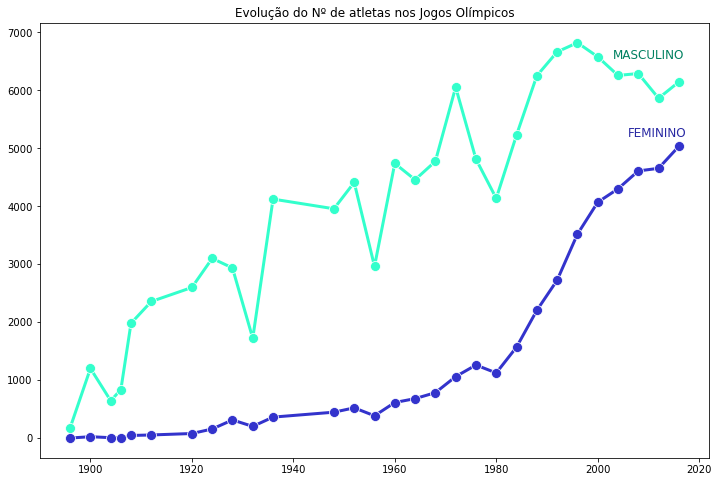

In [7]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="M", data=atletas, linewidth = 3, color = '#33ffcc', marker = 'o', markersize = 10)
g = sns.lineplot(x="Year", y="F", data=atletas, linewidth = 3, color = '#3333cc',marker = 'o', markersize = 10)


plt.text(2003,6550, 'MASCULINO', fontsize = 12, color = '#008060')
plt.text(2006,5200, 'FEMININO', fontsize = 12, color = '#2929a3')


plt.title('Evolução do Nº de atletas nos Jogos Olímpicos')
plt.ylabel('')
plt.xlabel("")

#### Proporção de atletas mulheres nos Jogos Olímpicos

Text(0.5, 0, '')

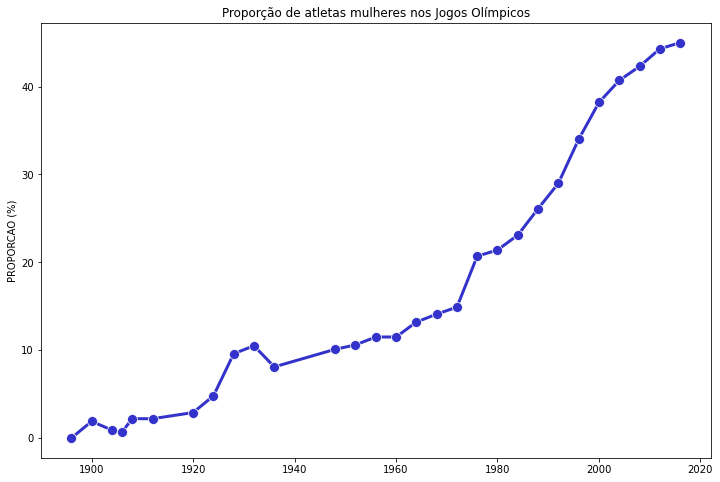

In [12]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="proporcao_mulher", data=atletas, linewidth = 3, color = '#3333cc', marker = 'o', markersize = 10)


plt.title('Proporção de atletas mulheres nos Jogos Olímpicos')
plt.ylabel('PROPORCAO (%)')
plt.xlabel("")

Text(0.5, 0, 'Proporção (%)')

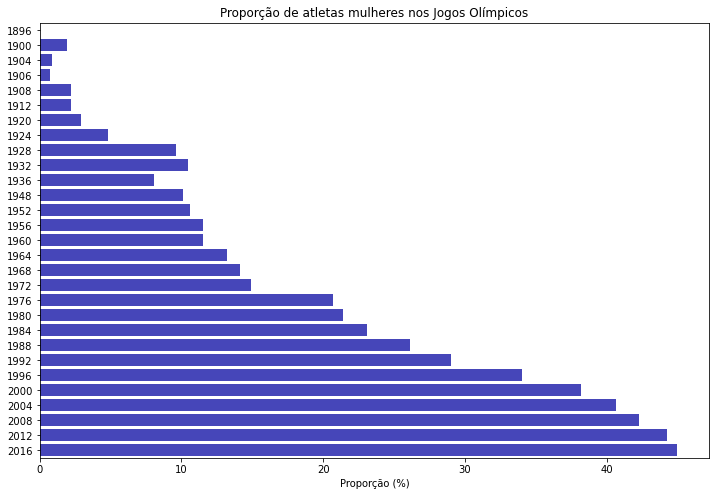

In [16]:
plt.subplots(figsize = (12,8))

g = sns.barplot(x="proporcao_mulher", y="Year", data=atletas, linewidth = 3, color = '#3333cc', orient='h')


plt.title('Proporção de atletas mulheres nos Jogos Olímpicos')
plt.ylabel('')
plt.xlabel("Proporção (%)")

##### Podemos verificar uma clara ascensão da proporção de atletas mulheres nos Jogos Olímpicos. Chegando quase a 50% nas olímpiadas de 2016

## 1.1 Participação Feminina na equipe olímpica brasileira

In [8]:
mulheres_bra = dados[(dados['Season'] == 'Summer') & (dados['NOC'] == 'BRA')]

mulheres_bra = mulheres_bra.drop_duplicates(subset=['Name', 'Year'])

mulheres_bra = mulheres_bra.groupby(['NOC', 'Year', 'Sex'])['Name'].count().reset_index()


In [9]:
mulheres_bra = mulheres_bra.pivot_table(values = 'Name', index = ['NOC', 'Year'], columns = 'Sex', aggfunc = 'sum').fillna(0).reset_index()

#mulheres_bra = mulheres_bra.groupby('Year')[['F','M']].sum().reset_index()

mulheres_bra['total'] = mulheres_bra['M'] + mulheres_bra['F']

mulheres_bra['proporcao_mulher'] = (mulheres_bra['F'] / mulheres_bra['total']*100)

mulheres_bra['proporcao_mulher'] = mulheres_bra['proporcao_mulher'].round(1)


In [45]:
#for i, x in enumerate(mulheres_bra):
#    if mulheres_bra[x].dtype == 'float64':
#        mulheres_bra[x] = mulheres_bra[x].astype(int)

In [10]:
mulheres_bra = mulheres_bra.rename(columns = {'F':'F_bra', 'M':'M_bra', 'total':'total_bra', 'proporcao_mulher': 'prop_bra'})


mulheres = pd.merge(atletas, mulheres_bra,how='left', on = 'Year')


mulheres = mulheres.fillna({'F_bra':0, 'M_bra': 0, 'total_bra': 0, 'prop_bra':0, 'NOC':'BRA'})


#### Evolução da proporção de atletas mulheres Brasil VS Mundo

Text(0.5, 0, '')

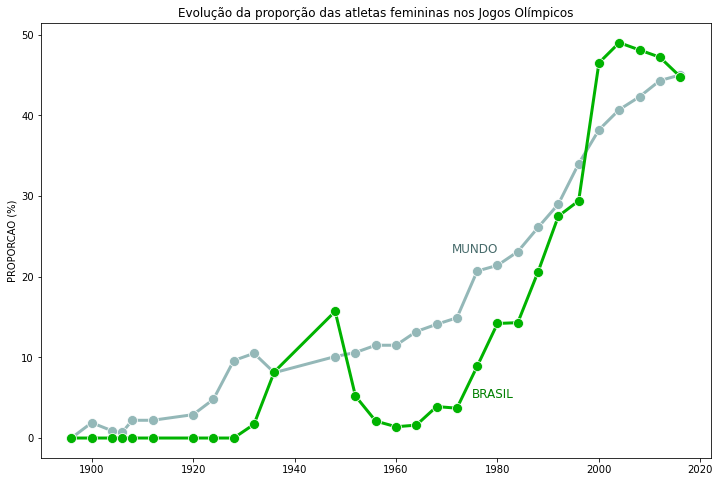

In [11]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="proporcao_mulher", data=mulheres, linewidth = 3, color = "#94b8b8", marker = 'o', markersize = 10)
g = sns.lineplot(x="Year", y="prop_bra", data=mulheres, linewidth = 3, color = '#00b300',marker = 'o', markersize = 10)


plt.text(1975,5, 'BRASIL', fontsize = 12, color = '#008000')
plt.text(1971,23, 'MUNDO', fontsize = 12, color = '#476b6b')


plt.title('Evolução da proporção das atletas femininas nos Jogos Olímpicos')
plt.ylabel('PROPORCAO (%)')
plt.xlabel("")

##### Curioso observar que a equipe Olímpica brasileira teve uma proporção de atletas mulheres considerável pra época nas Olímpiadas de xxxx. Maior que a proporção média das Olímpiadas. Chama atenção o fato também dessa proporção ter caído bastante após xxxx voltando ao mesmo patamar somente em 1986

#### Evolução do número de atletas na equipe olímpica brasileira por gênero

Text(0.5, 0, '')

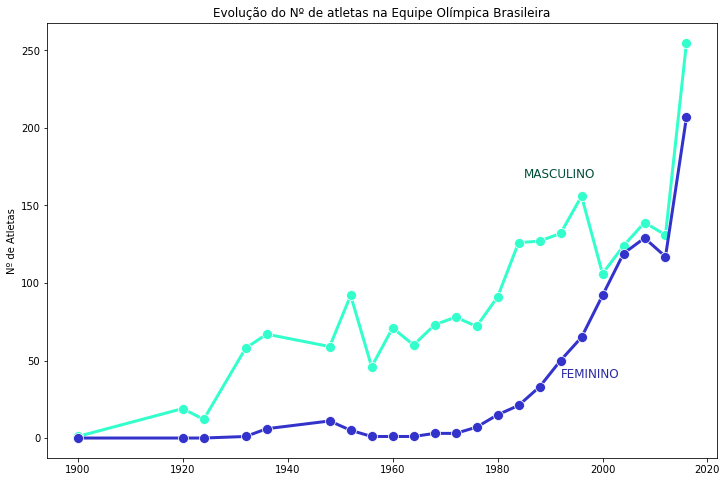

In [25]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="M_bra", data=mulheres_bra, linewidth = 3, color = '#33ffcc', marker = 'o', markersize = 10)
g = sns.lineplot(x="Year", y="F_bra", data=mulheres_bra, linewidth = 3, color = '#3333cc',marker = 'o', markersize = 10)

plt.text(1985,168, 'MASCULINO', fontsize = 12, color = '#004d39')
plt.text(1992,39, 'FEMININO', fontsize = 12, color = '#2929a3')


plt.title('Evolução do Nº de atletas na Equipe Olímpica Brasileira')
plt.ylabel('Nº de Atletas')
plt.xlabel("")

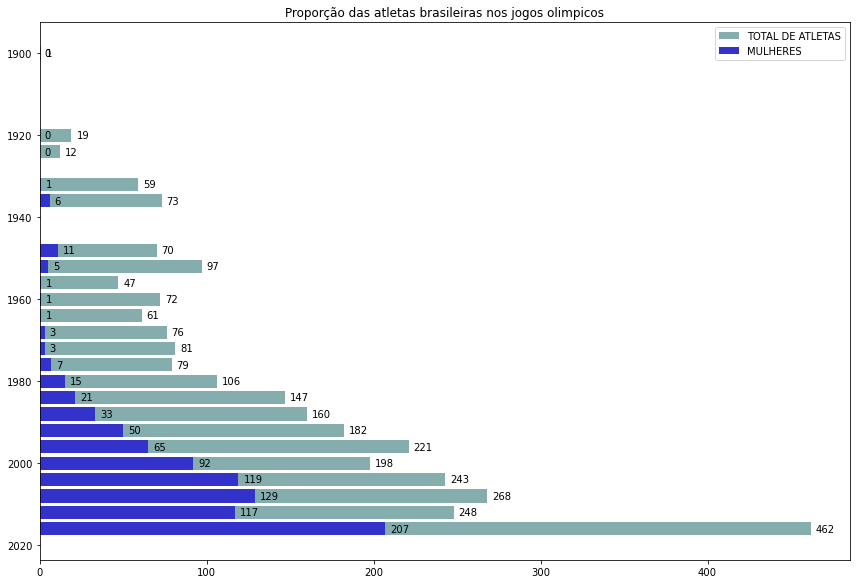

In [12]:
fig, ax = plt.subplots(figsize = (12,8))

ax.barh(mulheres_bra['Year'], mulheres_bra['total_bra'],height=3.2, align='center', color = '#85adad')
ax.barh(mulheres_bra['Year'], mulheres_bra['F_bra'],height=3.2, align='center', color = '#3333cc')

ax.invert_yaxis()  # labels read top-to-bottom


# THANK YOU STACKOVERFLOW
rects = ax.patches


for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{:.0f}".format(x_value)

    plt.annotate(
        label,                     
        (x_value, y_value),        
        xytext=(space, 0),         
        textcoords="offset points",
        va='center',               
        ha=ha,)


plt.tight_layout()
plt.title('Proporção das atletas brasileiras nos jogos olimpicos')
plt.legend(['TOTAL DE ATLETAS', 'MULHERES'])

## 2.0 - Share de medalhas

### E com relação as medalhas ? Será que com o passar dos anos a porção de medalhas conquistadas pelos 3 primeiros países do quadro diminuiu?

In [13]:
medalhas_totais = dados.dropna(subset = ['Medal'])

medalhas_totais = medalhas_totais[['ID', 'Name', 'NOC', 'Year', 'Season', 'Sport', 'Event', 'Medal']]

medalhas_totais = medalhas_totais[medalhas_totais['Season'] == 'Summer']

In [14]:
medalhas_totais = medalhas_totais.groupby(['NOC', 'Year', 'Event'])['Medal'].nunique().reset_index()

medalhas_totais = medalhas_totais.groupby(['NOC', 'Year']).sum().reset_index()

medalhas_totais = medalhas_totais.groupby('Year')[['Medal']].sum().reset_index().rename(columns = {'Medal': 'Medalhas_totais'})

#### Selecionando os 3 primeiros países no quadro de medalhas

In [15]:
podio = dados.dropna(subset = ['Medal'])

podio = podio[['ID', 'Name', 'NOC', 'Year', 'Season', 'Sport', 'Event', 'Medal']]

podio = podio[podio['Season'] == 'Summer']

In [16]:
podio = podio.groupby(['NOC', 'Year', 'Event'])['Medal'].nunique().reset_index()

podio = podio.groupby(['NOC', 'Year'])[['Medal']].sum().reset_index()

podio = podio.sort_values(['Year', 'Medal'], ascending = False).groupby('Year').head(3)

podio = podio.groupby('Year')[['Medal']].sum().reset_index()

In [17]:
podio = podio.groupby('Year')[['Medal']].sum().reset_index()

#### Juntando as duas bases

In [18]:
share_total = pd.merge(podio, medalhas_totais, how='left', on = 'Year')

share_total = share_total.dropna()

share_total['Medal'] = share_total['Medal'].astype(int)

share_total['proporcao'] = (share_total['Medal']/share_total['Medalhas_totais']*100).round(1)

#### Share de medalhas obtida pelo Top 3 do Quadro de medalhas

Text(0.5, 0, '')

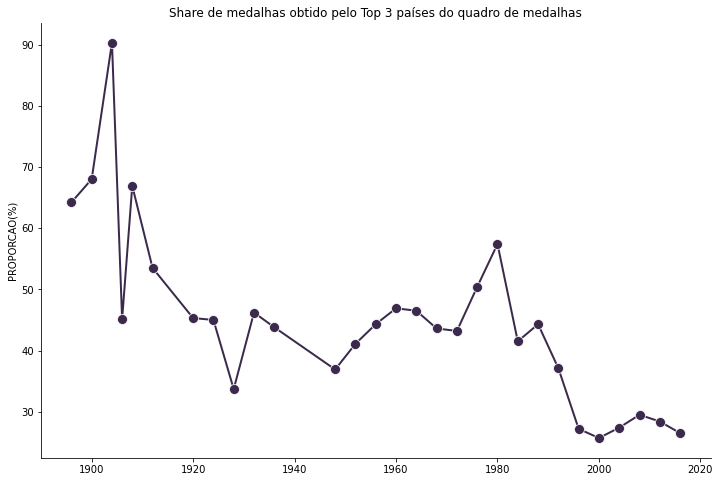

In [20]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="proporcao", data=share_total, linewidth = 2, color = '#3c2a4d', marker = 'o', markersize = 10)

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)



plt.title('Share de medalhas obtido pelo Top 3 países do quadro de medalhas')
plt.ylabel('PROPORCAO(%)')
plt.xlabel(None)

### E com relação ao Ouro ? Será que o número de países que conquistou 1 medalha de ouro aumentou com o passar dos anos ?

In [21]:
ouro = dados.dropna(subset = ['Medal'])

ouro = ouro[['ID', 'Name', 'NOC', 'Year', 'Season', 'Sport', 'Event', 'Medal']]

ouro = ouro[(ouro['Season'] == 'Summer') & (ouro['Medal'] == 'Gold') ]

In [22]:
ouro = ouro.groupby(['NOC', 'Year', 'Event'])['Medal'].nunique().reset_index()

ouro = ouro.groupby(['NOC', 'Year'])[['Medal']].sum().reset_index()

qtd_paisesouro = ouro.groupby('Year').agg({'NOC':'count'}).reset_index()

qtd_paisesouro.rename(columns={'NOC':'QtdPaisesOuro'},inplace=True)

ouro = ouro.sort_values(['Year', 'Medal'], ascending = False).groupby('Year').head(3)

ouro = ouro.groupby('Year')[['Medal']].sum().reset_index()

In [23]:
ouro_paises = ouro.merge(qtd_paisesouro, how='left', on='Year')

#### Número de países que conquistaram pelo menos 1 medalha de ouro

Text(0.5, 0, '')

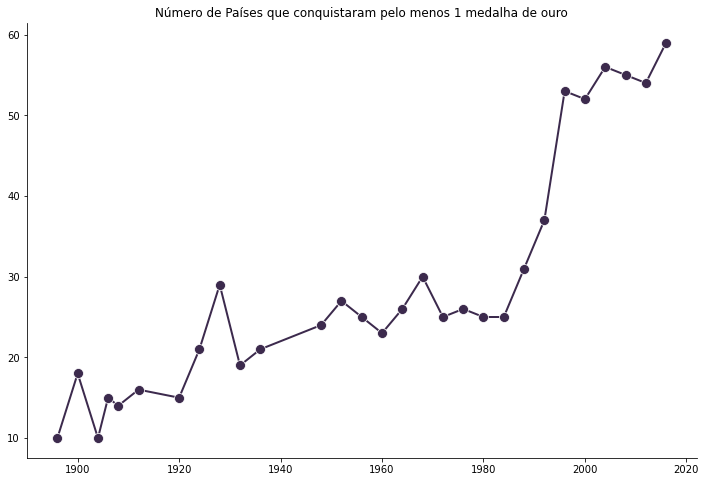

In [24]:
plt.subplots(figsize = (12,8))

g = sns.lineplot(x="Year", y="QtdPaisesOuro", data=ouro_paises, linewidth = 2, color = '#3c2a4d', marker = 'o', markersize = 10)

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)



plt.title('Número de Países que conquistaram pelo menos 1 medalha de ouro')
plt.ylabel('')
plt.xlabel(None)

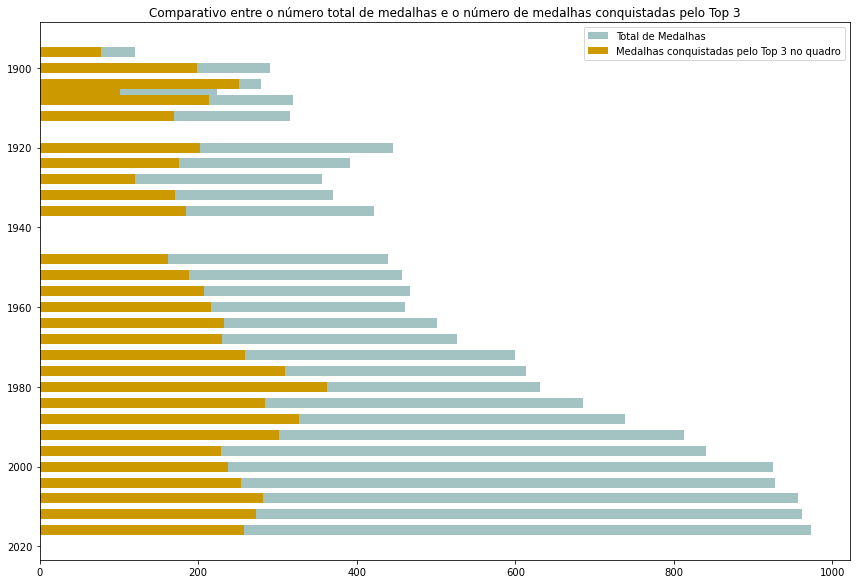

In [25]:
fig, ax = plt.subplots(figsize = (12,8))

ax.barh(share_total['Year'], share_total['Medalhas_totais'],height=2.5, align='center', color = '#a3c2c2')
ax.barh(share_total['Year'], share_total['Medal'],height=2.5, align='center', color = '#cc9900')

ax.invert_yaxis() 
plt.tight_layout()
plt.title('Comparativo entre o número total de medalhas e o número de medalhas conquistadas pelo Top 3')
plt.legend(['Total de Medalhas', 'Medalhas conquistadas pelo Top 3 no quadro'])

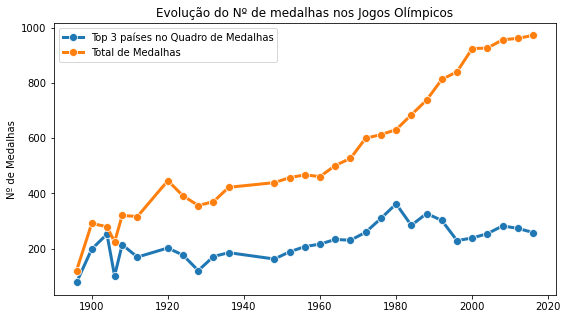

In [26]:
fig, ax = plt.subplots(figsize = (9,5))

g = sns.lineplot(x="Year", y="Medal", data=share_total, linewidth = 3, marker = 'o', markersize = 8)
g = sns.lineplot(x="Year", y="Medalhas_totais", data=share_total, linewidth = 3,marker = 'o', markersize = 8)

plt.title('Evolução do Nº de medalhas nos Jogos Olímpicos')
plt.ylabel('Nº de Medalhas')
plt.xlabel("")
plt.legend(['Top 3 países no Quadro de Medalhas','Total de Medalhas'])

### Número de países participando dos Jogos Olímpicos

In [27]:
paises = dados[dados['Season'] == 'Summer'].groupby('Year')[['NOC']].nunique().reset_index()

Text(0, 0.5, '')

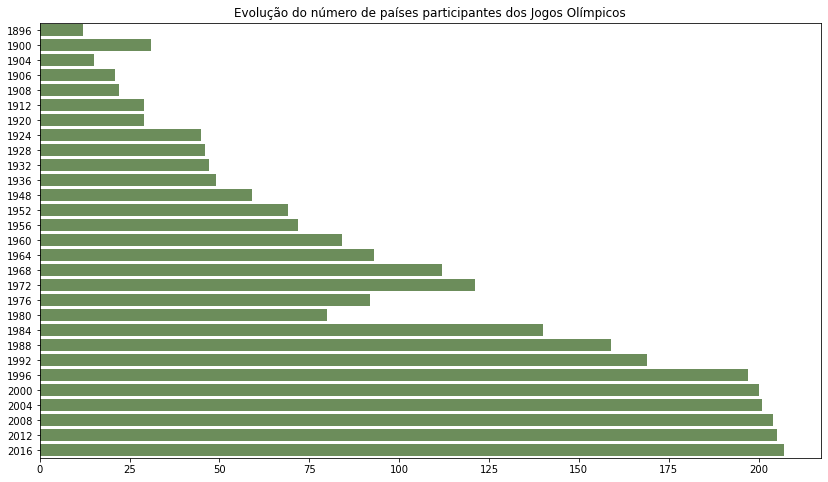

In [28]:
plt.subplots(1,1, figsize=(14, 8))


plot = sns.barplot(x = 'NOC', y = 'Year', data = paises, orient='h', color = '#699553')

plot.set_title('Evolução do número de países participantes dos Jogos Olímpicos')
plot.set_xlabel('')
plot.set_ylabel('')
